## Logistic Rgression on Iris_species 

In [1]:
# Step 01 import filterwarnings

from warnings import filterwarnings
filterwarnings('ignore')


In [2]:
# step 02 Read the Dataset 

import pandas as pd 
df = pd.read_csv('iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
# Step 03 Perform Basic Data Quality check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
 df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [5]:
df.duplicated().sum()

1

In [6]:
# step 04 separating X and Y Features 
X = df.drop(columns=['species'])
Y = df[['species']]

In [7]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
Y.head()

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


In [9]:
Y.value_counts()

species   
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [10]:
X.value_counts()

sepal_length  sepal_width  petal_length  petal_width
5.8           2.7          5.1           1.9            2
6.2           2.2          4.5           1.5            1
              2.9          4.3           1.3            1
              3.4          5.4           2.3            1
6.3           2.3          4.4           1.3            1
                                                       ..
5.4           3.9          1.3           0.4            1
                           1.7           0.4            1
5.5           2.3          4.0           1.3            1
              2.4          3.7           1.0            1
7.9           3.8          6.4           2.0            1
Name: count, Length: 149, dtype: int64

<Axes: xlabel='species'>

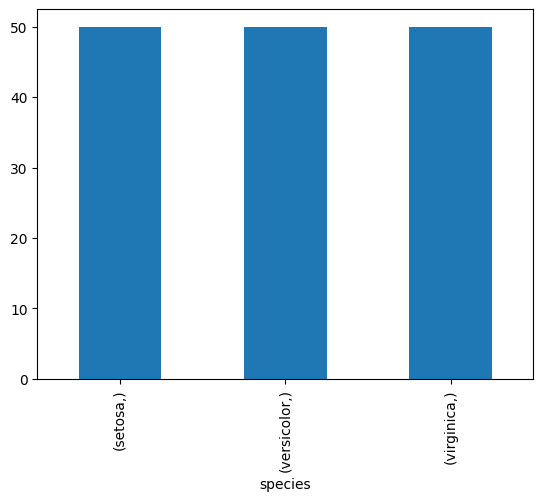

In [11]:
Y.value_counts().plot(kind='bar')

In [12]:
# step 05 Preprocessing on X

X.dtypes



sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
dtype: object

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [14]:
num_pipe = Pipeline(steps=[('impute',SimpleImputer(strategy='mean')),
                    ('scaler',StandardScaler())]).set_output(transform='pandas')
    


In [15]:
X_pre = num_pipe.fit_transform(X)
X_pre.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [17]:
# Step Train Test split 

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X_pre,Y,test_size=0.2,random_state=21)

In [18]:
xtrain.head()

,sepal_length,sepal_width,petal_length,petal_width
41,-1.627688,-1.743357,-1.397064,-1.183812
131,2.492019,1.709595,1.501645,1.053935
70,0.068662,0.328414,0.592246,0.790671
46,-0.900681,1.709595,-1.226552,-1.315444
126,0.432165,-0.592373,0.592246,0.790671


In [19]:
ytrain.head()

,species
41,setosa
131,virginica
70,versicolor
46,setosa
126,virginica


In [20]:
xtest.head()

,sepal_length,sepal_width,petal_length,petal_width
92,-0.052506,-1.052767,0.137547,0.000878
44,-0.900681,1.709595,-1.056039,-1.052180
7,-1.021849,0.788808,-1.283389,-1.315444
21,-0.900681,1.479398,-1.283389,-1.052180
95,-0.173674,-0.131979,0.251221,0.000878


In [21]:
ytest.head()

,species
92,versicolor
44,setosa
7,setosa
21,setosa
95,versicolor


In [22]:
xtrain.shape

(120, 4)

In [23]:
xtest.shape

(30, 4)

In [24]:
# Step Build the Model 

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(xtrain,ytrain)

LogisticRegression()

In [25]:
# Evaluate the Model

# Accuracy in Train 

model.score(xtrain,ytrain)

0.975

In [26]:
# Accuracy in test
model.score(xtest,ytest)

0.9333333333333333

In [27]:
# predict Results for train and test 
ypred_train = model.predict(xtrain)
ypred_test = model.predict(xtest)

In [28]:
ypred_train[0:5]

array(['setosa', 'virginica', 'virginica', 'setosa', 'virginica'],
      dtype=object)

In [29]:
ytrain.head()

,species
41,setosa
131,virginica
70,versicolor
46,setosa
126,virginica


In [30]:
ypred_test[0:5]

array(['versicolor', 'setosa', 'setosa', 'setosa', 'versicolor'],
      dtype=object)

In [32]:
ytrain.head()

,species
41,setosa
131,virginica
70,versicolor
46,setosa
126,virginica


In [33]:
# probabilities of prediction 
yprob_train = model.predict_proba(xtrain)
yprob_test = model.predict_proba(xtest)

In [34]:
model.classes_


array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [35]:
yprob_train[0:5]

array([[7.55229350e-01, 2.44762128e-01, 8.52229813e-06],
       [6.57280443e-05, 6.07417129e-02, 9.39192559e-01],
       [1.39732825e-02, 4.74592748e-01, 5.11433970e-01],
       [9.90972459e-01, 9.02748222e-03, 5.84411653e-08],
       [1.72281283e-03, 3.59401321e-01, 6.38875866e-01]])

In [36]:
yprob_test[0:5]

array([[2.18854163e-02, 9.23963653e-01, 5.41509310e-02],
       [9.84787938e-01, 1.52117167e-02, 3.45508699e-07],
       [9.75664327e-01, 2.43354572e-02, 2.16173462e-07],
       [9.84825158e-01, 1.51746290e-02, 2.12971924e-07],
       [7.59142393e-02, 8.81099650e-01, 4.29861106e-02]])

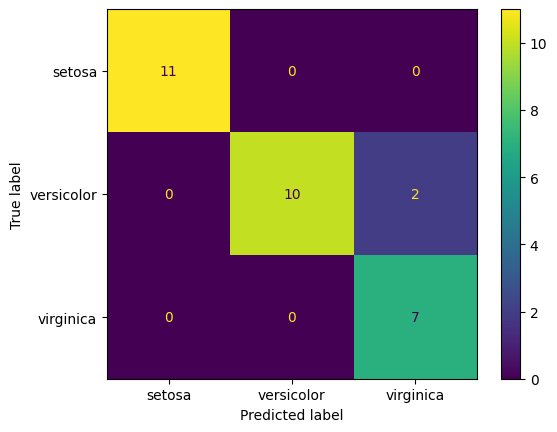

In [37]:
# plot confusion metrix on test data
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay
cf= confusion_matrix(ytest, ypred_test)
cfd = ConfusionMatrixDisplay(cf,display_labels=model.classes_)
cfd.plot()

In [38]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred_test))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      0.83      0.91        12
   virginica       0.78      1.00      0.88         7

    accuracy                           0.93        30
   macro avg       0.93      0.94      0.93        30
weighted avg       0.95      0.93      0.93        30



In [39]:
# step Out of sample predictions 

xnew = pd.read_csv('iris_sample.csv')
xnew

,sepal_length,sepal_width,petal_length,petal_width
0,5.5,2.5,4.0,1.3
1,6.9,3.1,5.1,2.3
2,5.1,2.5,3.0,1.1
3,4.4,2.9,NaN,0.2
4,5.9,3.0,5.1,1.8
5,5.5,3.5,1.3,0.2
6,5.6,NaN,3.6,1.3
7,6.5,3.0,5.2,2.0
8,5.3,3.7,1.5,0.2
9,5.1,3.4,1.5,NaN


In [40]:
xnew_pre  =  num_pipe.transform(xnew)
xnew_pre

,sepal_length,sepal_width,petal_length,petal_width
0,-0.416010,-1.282963,0.137547,0.132510
1,1.280340,0.098217,0.762758,1.448832
2,-0.900681,-1.282963,-0.430828,-0.130755
3,-1.748856,-0.362176,0.000000,-1.315444
4,0.068662,-0.131979,0.762758,0.790671
5,-0.416010,1.019004,-1.397064,-1.315444
6,-0.294842,0.000000,-0.089803,0.132510
7,0.795669,-0.131979,0.819596,1.053935
8,-0.658345,1.479398,-1.283389,-1.315444
9,-0.900681,0.788808,-1.283389,0.000000


In [41]:
preds = model.predict(xnew_pre)

In [43]:
preds

array(['versicolor', 'virginica', 'versicolor', 'setosa', 'virginica',
       'setosa', 'versicolor', 'virginica', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'versicolor', 'virginica'],
      dtype=object)

In [44]:
probs = model.predict_proba(xnew_pre)
probs

array([[2.29746476e-02, 8.91271439e-01, 8.57539138e-02],
       [8.05152271e-05, 6.05628219e-02, 9.39356663e-01],
       [1.35657660e-01, 8.56401456e-01, 7.94088357e-03],
       [8.00776411e-01, 1.99133497e-01, 9.00922201e-05],
       [3.89172143e-03, 3.16896856e-01, 6.79211422e-01],
       [9.62972279e-01, 3.70274955e-02, 2.25784020e-07],
       [1.44400967e-01, 8.32722246e-01, 2.28767873e-02],
       [4.15350008e-04, 1.45657361e-01, 8.53927289e-01],
       [9.83650240e-01, 1.63496556e-02, 1.04343601e-07],
       [8.87806107e-01, 1.12137778e-01, 5.61145414e-05],
       [2.04945081e-02, 9.14643868e-01, 6.48616240e-02],
       [3.47629119e-02, 9.45710839e-01, 1.95262486e-02],
       [1.19620823e-06, 1.17883634e-02, 9.88210440e-01],
       [3.37529028e-03, 6.83133009e-01, 3.13491701e-01],
       [5.53394547e-04, 4.09978743e-01, 5.89467863e-01]])

In [45]:
import numpy as np
max_probs = np.max(probs,axis=1)
max_probs

array([0.89127144, 0.93935666, 0.85640146, 0.80077641, 0.67921142,
       0.96297228, 0.83272225, 0.85392729, 0.98365024, 0.88780611,
       0.91464387, 0.94571084, 0.98821044, 0.68313301, 0.58946786])

In [46]:
# save above results in dataframe 
xnew['species_pred']=preds
xnew['prob']=max_probs

In [47]:
xnew

,sepal_length,sepal_width,petal_length,petal_width,species_pred,prob
0,5.5,2.5,4.0,1.3,versicolor,0.891271
1,6.9,3.1,5.1,2.3,virginica,0.939357
2,5.1,2.5,3.0,1.1,versicolor,0.856401
3,4.4,2.9,NaN,0.2,setosa,0.800776
4,5.9,3.0,5.1,1.8,virginica,0.679211
5,5.5,3.5,1.3,0.2,setosa,0.962972
6,5.6,NaN,3.6,1.3,versicolor,0.832722
7,6.5,3.0,5.2,2.0,virginica,0.853927
8,5.3,3.7,1.5,0.2,setosa,0.983650
9,5.1,3.4,1.5,NaN,setosa,0.887806


In [48]:
xnew['species_pred'].value_counts()

species_pred
versicolor    6
virginica     5
setosa        4
Name: count, dtype: int64

<Axes: xlabel='species_pred'>

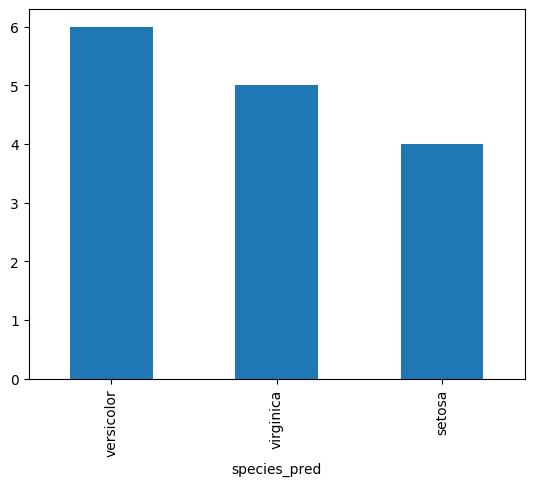

In [49]:
xnew['species_pred'].value_counts().plot(kind='bar')

In [50]:
# save above results to csv 
xnew.to_csv('Results.csv',index=False)